In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
emissions = pd.read_csv('iea_emissions.csv')  
gas_abatement = pd.read_csv('iea_oil_gas_abatement.csv') 
coal_abatement = pd.read_csv('iea_coal_abatement.csv')  

In [4]:
emissions['emissions (kt)'] = pd.to_numeric(emissions['emissions (kt)'], errors='coerce')
emissions['baseYear'] = emissions['baseYear'].astype(str).str.extract(r'(\d{4})').astype(float)
emissions = emissions.dropna(subset=['emissions (kt)', 'baseYear'])

In [6]:
gas_abatement['savings (kt)'] = pd.to_numeric(gas_abatement['savings (kt)'], errors='coerce')
gas_abatement['cost (USD/MBtu)'] = pd.to_numeric(gas_abatement['cost (USD/MBtu)'], errors='coerce')





In [7]:
coal_abatement['savings (kt)'] = pd.to_numeric(coal_abatement['savings (kt)'], errors='coerce')
coal_abatement['cost (USD/GJ)'] = pd.to_numeric(coal_abatement['cost (USD/GJ)'], errors='coerce')



In [8]:
latest_year = emissions['baseYear'].max()
em_by_country = emissions[emissions['baseYear'] == latest_year].groupby('country')['emissions (kt)'].sum().sort_values(ascending=False)



/var/folders/gf/lf9k9p2j5j5fcvdnh2mcnqpc0000gn/T/ipykernel_66133/1609681886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=em_by_country.index[:15], x=em_by_country.values[:15], palette='Reds_r')


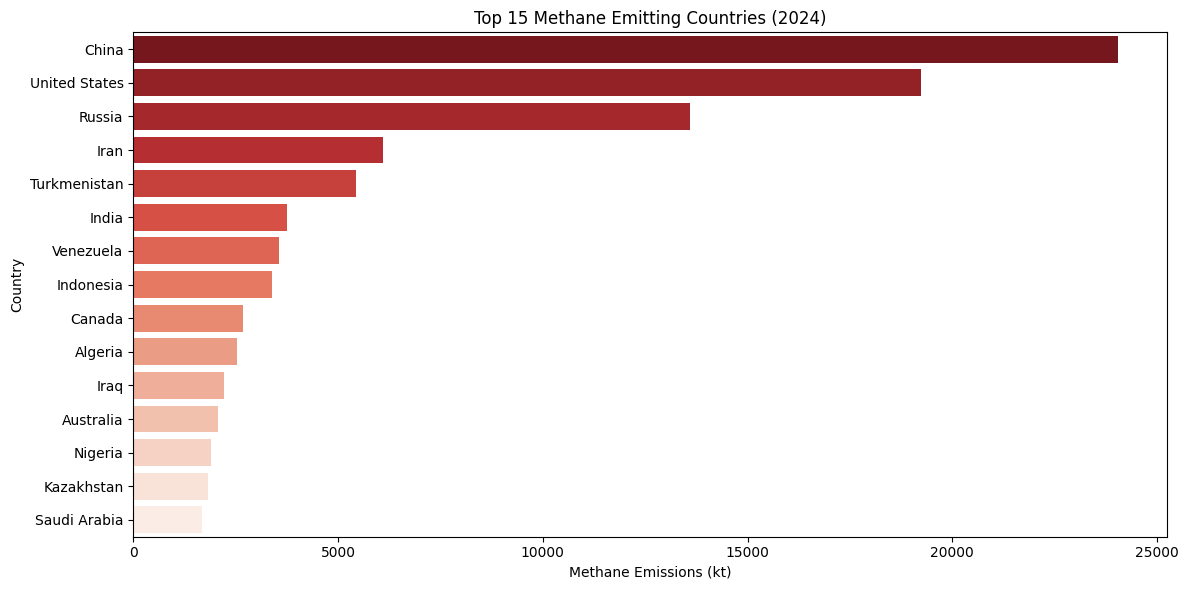

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(y=em_by_country.index[:15], x=em_by_country.values[:15], palette='Reds_r')
plt.title(f'Top 15 Methane Emitting Countries ({int(latest_year)})')
plt.xlabel('Methane Emissions (kt)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [53]:
emissions

,region,country,emissions (kt),source,type,segment,reason,baseYear,emissionsRank,energyRank,notes,region_group
0,Africa,Algeria,256.01,IEA,Agriculture,Total,All,2019.0,20.0,11.0,Average based on United Nations Framework Conv...,None
1,Africa,Algeria,47.05,IEA,Energy,Abandoned facilities,All,2024.0,20.0,11.0,NaN,None
2,Africa,Algeria,0.23,IEA,Energy,Bioenergy,All,2022.0,20.0,11.0,Estimates from end-uses are for 2022 or 2023 (...,None
3,Africa,Algeria,75.83,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2024.0,20.0,11.0,NaN,None
4,Africa,Algeria,107.98,IEA,Energy,Gas pipelines and LNG facilities,Vented,2024.0,20.0,11.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1581,World,NaN,4588.80,IEA,Energy,Satellite-detected large oil and gas emissions,All,2024.0,NaN,NaN,NaN,None
1582,World,NaN,25904.25,IEA,Energy,Steam coal,All,2024.0,NaN,NaN,NaN,None
1583,World,NaN,144562.48,IEA,Energy,Total,All,2022.0,NaN,NaN,NaN,None
1584,World,NaN,8433.72,IEA,Other,Total,All,2019.0,NaN,NaN,Average based on United Nations Framework Conv...,None


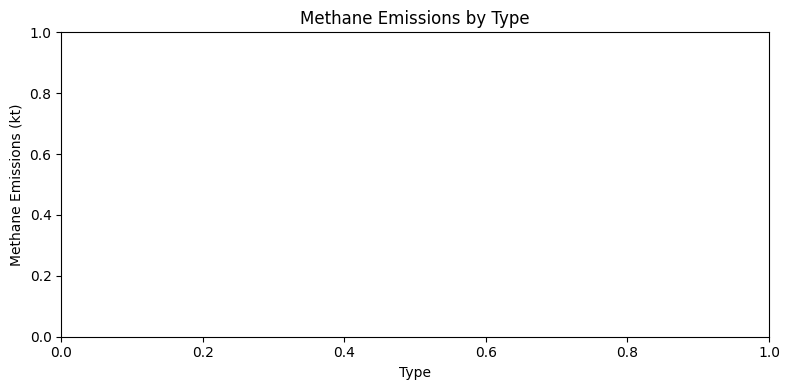

In [52]:
em_by_type = emissions[emissions['baseYear'] == 2023.0].groupby('type')['emissions (kt)'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=em_by_type.index, y=em_by_type.values, palette='Blues')
plt.title('Methane Emissions by Type')
plt.ylabel('Methane Emissions (kt)')
plt.xlabel('Type')
plt.tight_layout()
plt.show()

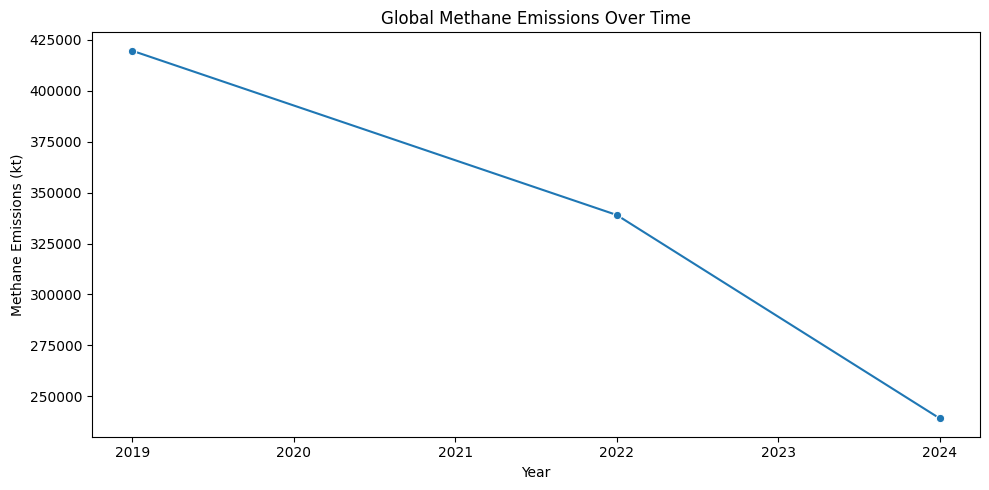

In [13]:
em_time = emissions.groupby('baseYear')['emissions (kt)'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=em_time.index, y=em_time.values, marker='o')
plt.title('Global Methane Emissions Over Time')
plt.ylabel('Methane Emissions (kt)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

/var/folders/gf/lf9k9p2j5j5fcvdnh2mcnqpc0000gn/T/ipykernel_66133/3118129680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=gas_abatement_by_country.index[:15], x=gas_abatement_by_country.values[:15], palette='Greens')


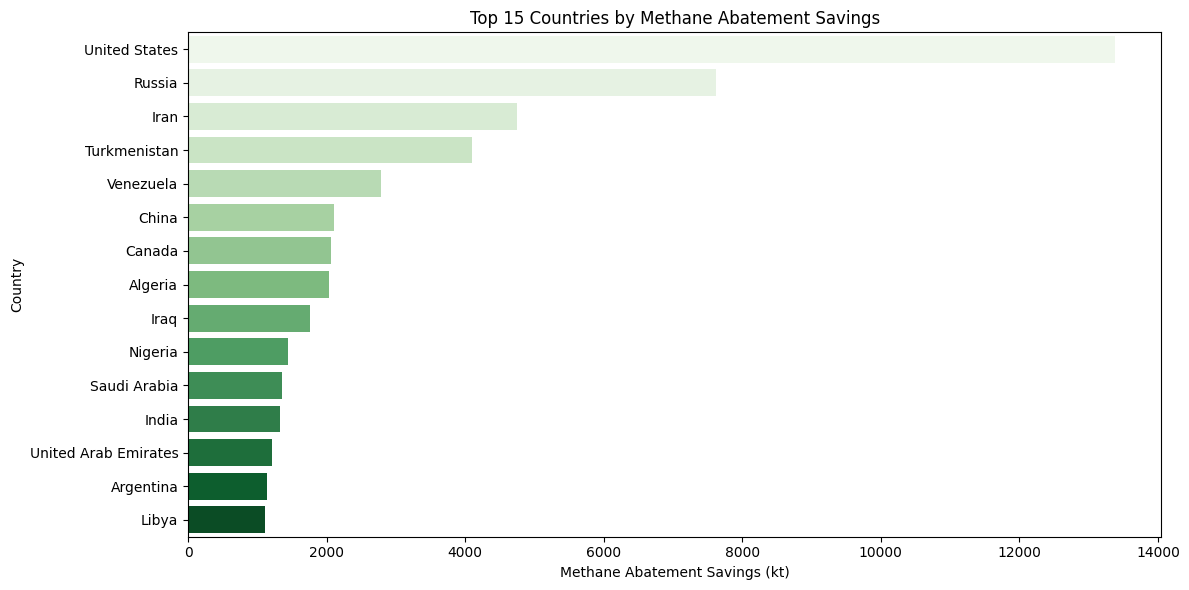

In [15]:
gas_abatement_by_country = gas_abatement.groupby('country')['savings (kt)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y=gas_abatement_by_country.index[:15], x=gas_abatement_by_country.values[:15], palette='Greens')
plt.title('Top 15 Countries by Methane Abatement Savings')
plt.xlabel('Methane Abatement Savings (kt)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

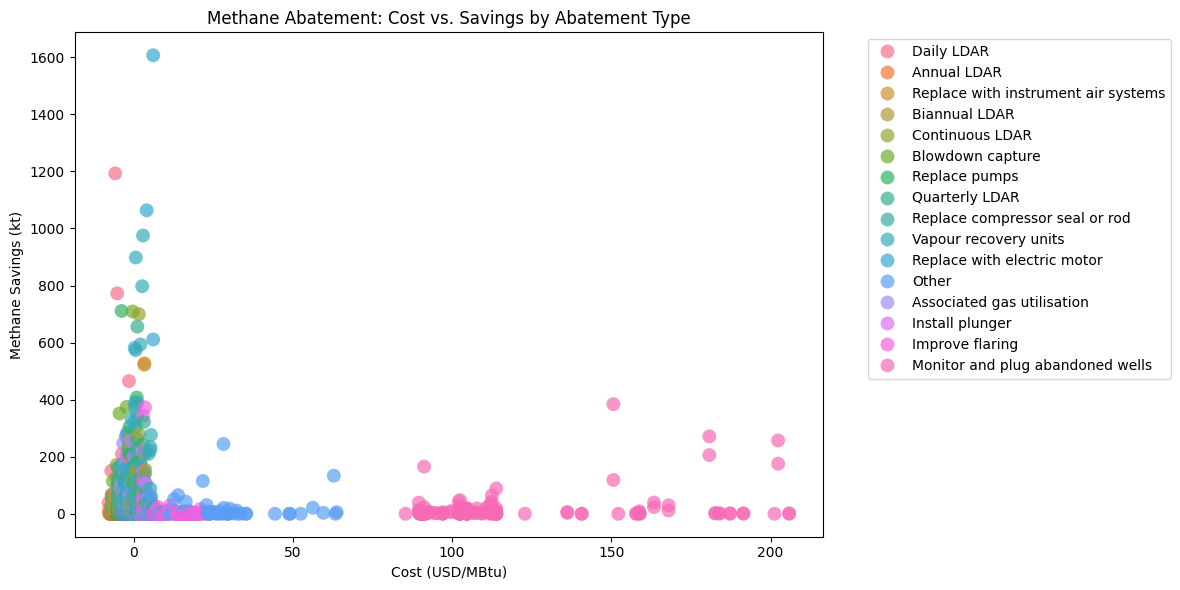

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=gas_abatement, x='cost (USD/MBtu)', y='savings (kt)', hue='abatement', s=100, alpha=0.7,edgecolor='none')
plt.title('Methane Abatement: Cost vs. Savings by Abatement Type')
plt.xlabel('Cost (USD/MBtu)')
plt.ylabel('Methane Savings (kt)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

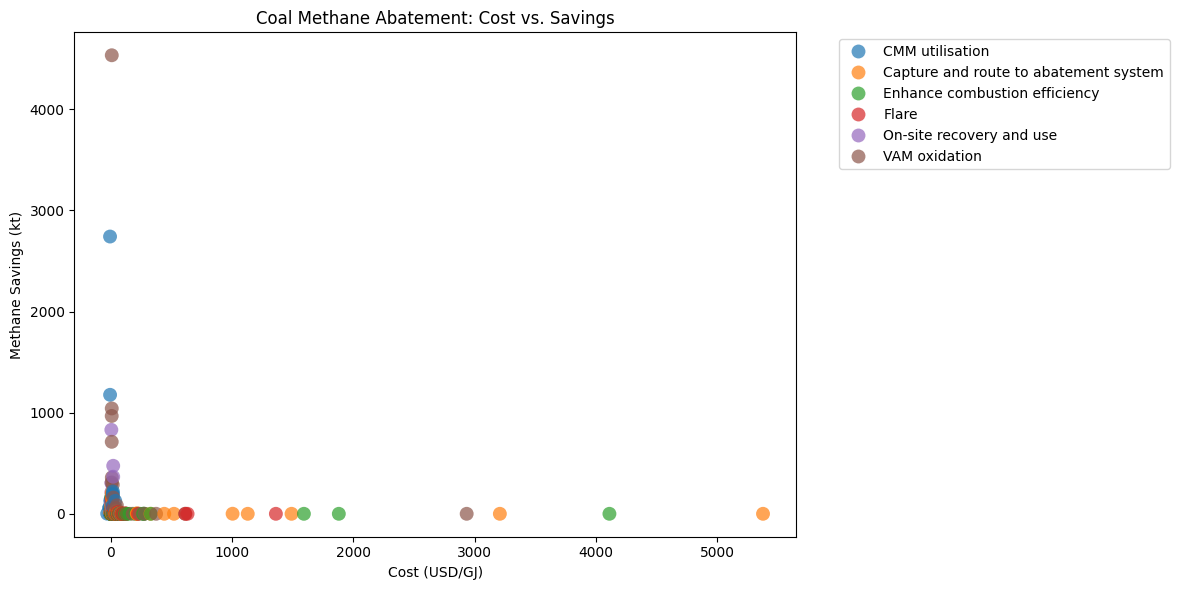

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=coal_abatement, x='cost (USD/GJ)', y='savings (kt)', hue='abatement',s=100, alpha=0.7,edgecolor='none')
plt.title('Coal Methane Abatement: Cost vs. Savings')
plt.xlabel('Cost (USD/GJ)')
plt.ylabel('Methane Savings (kt)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

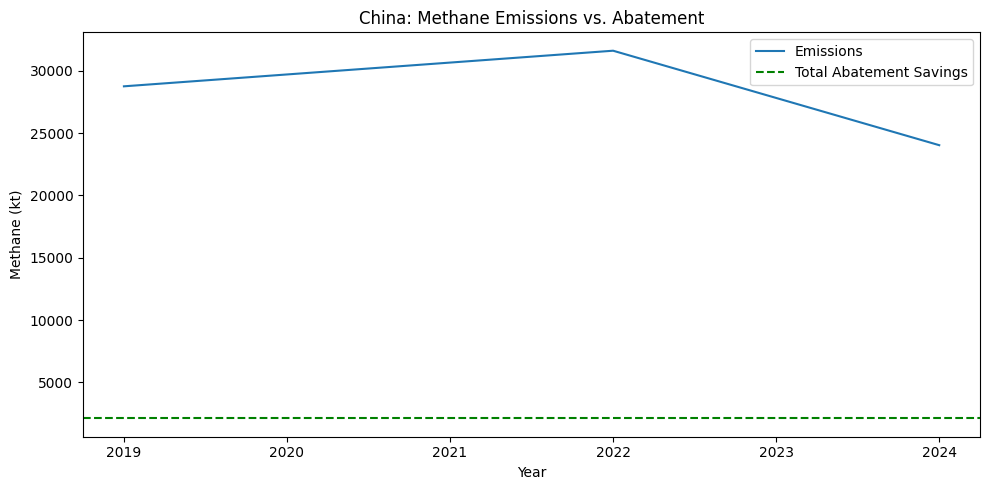

In [20]:
country = 'China'
em_c = emissions[emissions['country'] == country].groupby('baseYear')['emissions (kt)'].sum()
ab_c = gas_abatement[gas_abatement['country'] == country].groupby('abatement').agg({'savings (kt)':'sum'}).sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=em_c.index, y=em_c.values, label='Emissions')
plt.axhline(y=ab_c.values[0], color='g', linestyle='--', label='Total Abatement Savings')
plt.title(f'{country}: Methane Emissions vs. Abatement')
plt.ylabel('Methane (kt)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
print("Top methane emitting countries (latest year):")
print(em_by_country.head(10))
print("\nTop abatement countries:")
print(gas_abatement_by_country.head(10))
print("\nEmissions by type:")
print(em_by_type)
print("\nAbatement by type (total savings):")
print(gas_abatement.groupby('abatement')['savings (kt)'].sum().sort_values(ascending=False).head(10))



Top methane emitting countries (latest year):
country
China            24039.35
United States    19243.29
Russia           13588.15
Iran              6089.14
Turkmenistan      5439.27
India             3757.35
Venezuela         3570.34
Indonesia         3389.39
Canada            2670.00
Algeria           2536.37
Name: emissions (kt), dtype: float64

Top abatement countries:
country
United States    13380.49
Russia            7618.01
Iran              4751.81
Turkmenistan      4095.46
Venezuela         2778.69
China             2104.62
Canada            2058.57
Algeria           2041.96
Iraq              1757.57
Nigeria           1448.39
Name: savings (kt), dtype: float64

Emissions by type:
type
Energy         578249.83
Agriculture    274541.21
Waste          128313.73
Other           16867.43
Name: emissions (kt), dtype: float64

Abatement by type (total savings):
abatement
Vapour recovery units          13732.74
Replace with electric motor     8544.31
Quarterly LDAR                  

In [26]:
EU27 = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]


In [27]:
def assign_region(row):
    if row['country'] == 'United States':
        return 'USA'
    elif row['country'] == 'India':
        return 'India'
    elif row['country'] == 'China':
        return 'China'
    elif row['country'] in EU27 or 'EU' in str(row['country']):
        return 'EU27'
    else:
        return None


In [46]:
emissions_focus

,region,country,emissions (kt),source,type,segment,reason,baseYear,emissionsRank,energyRank,notes,region_group
452,Asia Pacific,China,18177.78,IEA,Agriculture,Total,All,2019.0,1.0,1.0,Average based on United Nations Framework Conv...,China
453,Asia Pacific,China,2798.86,IEA,Energy,Abandoned facilities,All,2024.0,1.0,1.0,NaN,China
454,Asia Pacific,China,2648.32,IEA,Energy,Bioenergy,All,2022.0,1.0,1.0,Estimates from end-uses are for 2022 or 2023 (...,China
455,Asia Pacific,China,5450.21,IEA,Energy,Coking coal,All,2024.0,1.0,1.0,NaN,China
456,Asia Pacific,China,260.56,IEA,Energy,Gas pipelines and LNG facilities,Fugitive,2024.0,1.0,1.0,NaN,China
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,North America,United States,830.70,IEA,Energy,Satellite-detected large oil and gas emissions,All,2024.0,2.0,2.0,NaN,USA
1436,North America,United States,1109.24,IEA,Energy,Steam coal,All,2024.0,2.0,2.0,NaN,USA
1437,North America,United States,20500.58,IEA,Energy,Total,All,2022.0,2.0,2.0,NaN,USA
1438,North America,United States,758.55,IEA,Other,Total,All,2019.0,2.0,2.0,Average based on United Nations Framework Conv...,USA


In [48]:
emissions_focus[emissions_focus['baseYear'] == 2024.0]['type'].unique()

array(['Energy'], dtype=object)

In [30]:
emissions['region_group'] = emissions.apply(assign_region, axis=1)
gas_abatement['region_group'] = gas_abatement.apply(assign_region, axis=1)
coal_abatement['region_group'] = coal_abatement.apply(assign_region, axis=1)

# --- 5. Filter for regions of interest ---
regions = ['USA', 'India', 'China', 'EU27']
emissions_focus = emissions[emissions['region_group'].isin(regions)]
abatement_focus = gas_abatement[gas_abatement['region_group'].isin(regions)]
coal_abatement_focus = coal_abatement[coal_abatement['region_group'].isin(regions)]




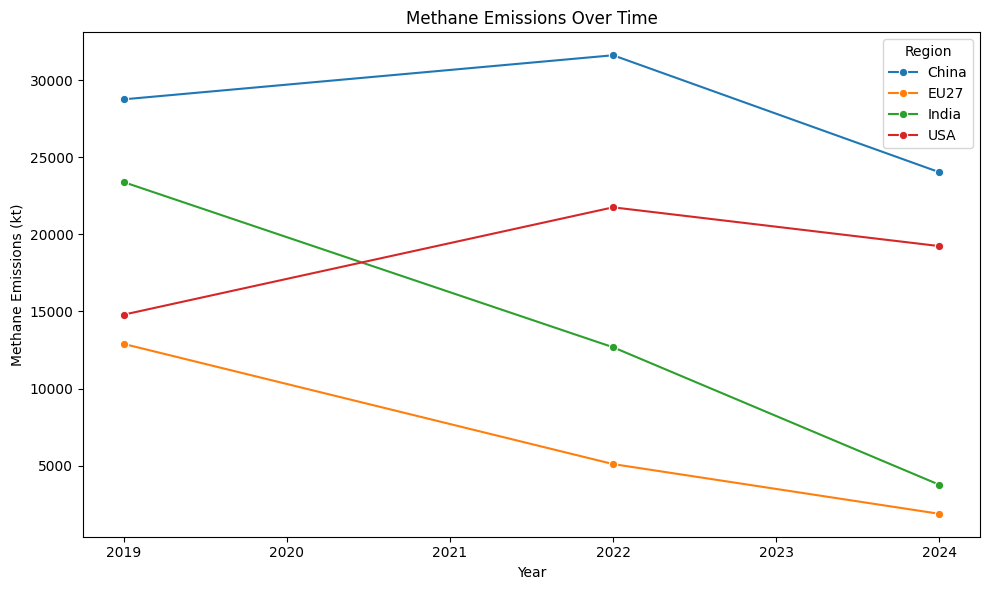

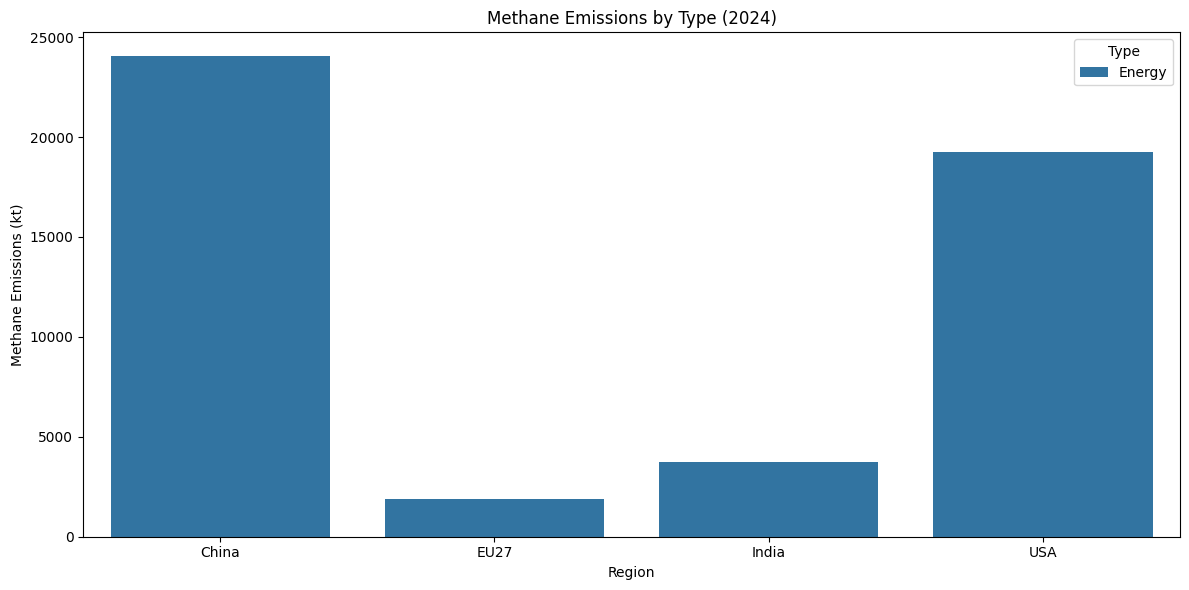

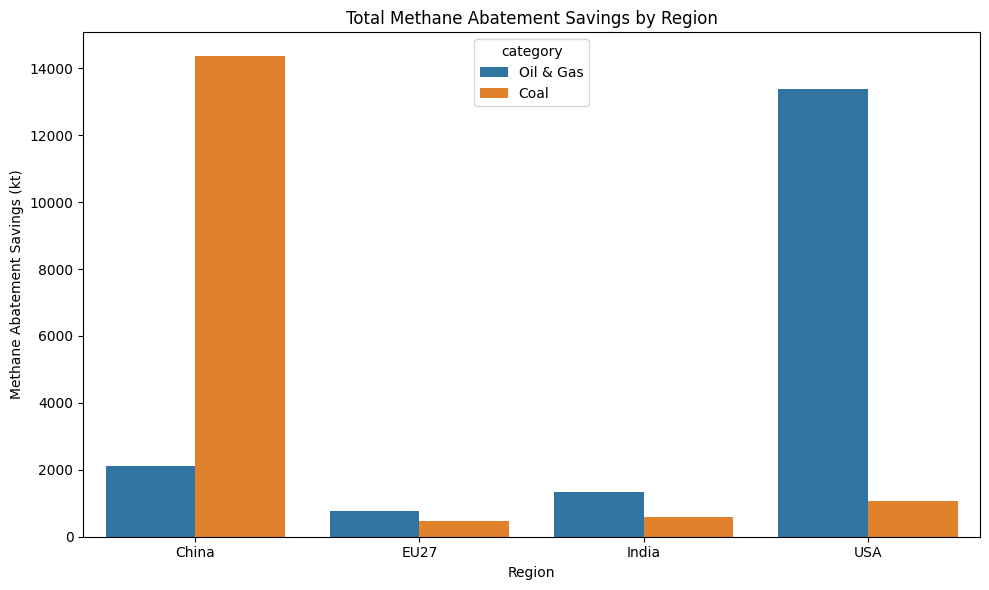

In [31]:
# --- 6. Emissions Over Time ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=emissions_focus.groupby(['baseYear', 'region_group'])['emissions (kt)'].sum().reset_index(),
    x='baseYear', y='emissions (kt)', hue='region_group', marker='o'
)
plt.title('Methane Emissions Over Time')
plt.ylabel('Methane Emissions (kt)')
plt.xlabel('Year')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# --- 7. Emissions by Type (latest year) ---
latest_year = emissions_focus['baseYear'].max()
em_type = emissions_focus[emissions_focus['baseYear'] == latest_year]
em_type = em_type.groupby(['region_group', 'type'])['emissions (kt)'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=em_type, x='region_group', y='emissions (kt)', hue='type')
plt.title(f'Methane Emissions by Type ({int(latest_year)})')
plt.ylabel('Methane Emissions (kt)')
plt.xlabel('Region')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# --- 8. Abatement Savings by Region ---
abatement_savings = abatement_focus.groupby('region_group')['savings (kt)'].sum().reset_index()
coal_abatement_savings = coal_abatement_focus.groupby('region_group')['savings (kt)'].sum().reset_index()
abatement_savings['category'] = 'Oil & Gas'
coal_abatement_savings['category'] = 'Coal'
all_abatement = pd.concat([abatement_savings, coal_abatement_savings])

plt.figure(figsize=(10,6))
sns.barplot(data=all_abatement, x='region_group', y='savings (kt)', hue='category')
plt.title('Total Methane Abatement Savings by Region')
plt.ylabel('Methane Abatement Savings (kt)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()



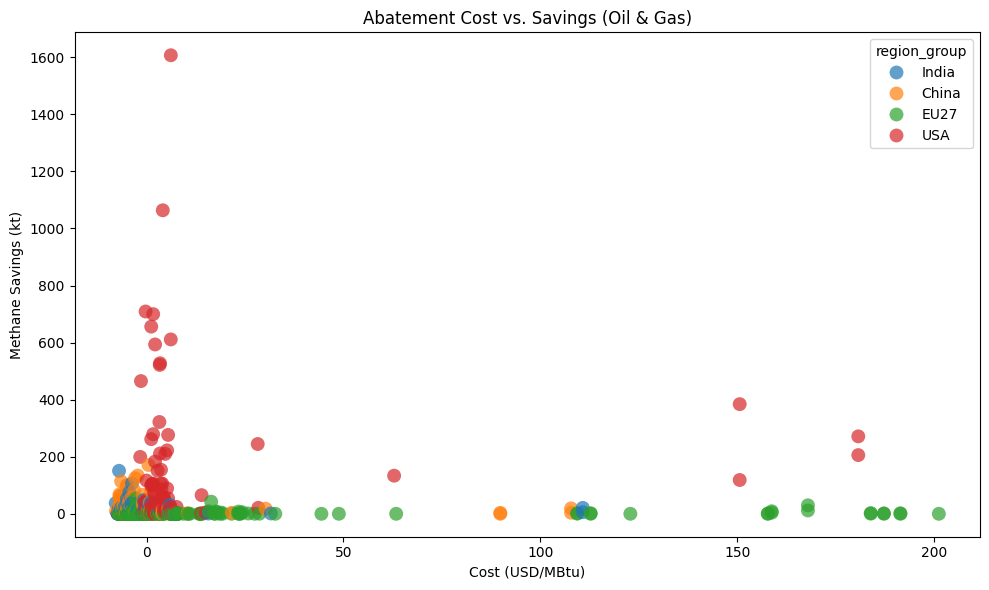

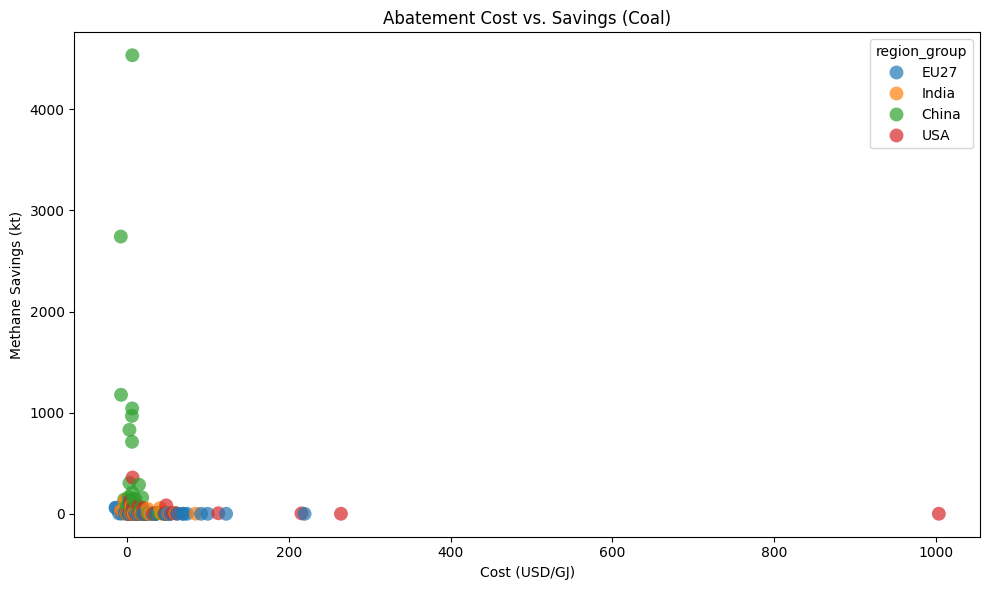

=== Methane Emissions (latest year) ===
type            Energy
region_group          
China         24039.35
EU27           1871.11
India          3757.35
USA           19243.29

=== Total Methane Abatement Savings (Oil & Gas) ===
  region_group  savings (kt)   category
0        China       2104.62  Oil & Gas
1         EU27        756.57  Oil & Gas
2        India       1326.38  Oil & Gas
3          USA      13380.49  Oil & Gas

=== Total Methane Abatement Savings (Coal) ===
  region_group  savings (kt) category
0        China      14358.31     Coal
1         EU27        468.58     Coal
2        India        585.50     Coal
3          USA       1067.70     Coal


In [42]:
# --- 9. Abatement Cost vs. Savings ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=abatement_focus, x='cost (USD/MBtu)', y='savings (kt)', s=100, hue='region_group', alpha=0.7, edgecolor='none'
)
plt.title('Abatement Cost vs. Savings (Oil & Gas)')
plt.xlabel('Cost (USD/MBtu)')
plt.ylabel('Methane Savings (kt)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=coal_abatement_focus, x='cost (USD/GJ)', y='savings (kt)', s=100,hue='region_group', alpha=0.7, edgecolor='none'
)
plt.title('Abatement Cost vs. Savings (Coal)')
plt.xlabel('Cost (USD/GJ)')
plt.ylabel('Methane Savings (kt)')
plt.tight_layout()
plt.show()

# --- 10. Print Key Insights ---
print("=== Methane Emissions (latest year) ===")
print(em_type.pivot(index='region_group', columns='type', values='emissions (kt)'))
print("\n=== Total Methane Abatement Savings (Oil & Gas) ===")
print(abatement_savings)
print("\n=== Total Methane Abatement Savings (Coal) ===")
print(coal_abatement_savings)
